# Анализ системы метрик приложения

Вы — продуктовый аналитик приложения Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

In [3]:
dfs = {
    'visits': visits,
    'orders': orders,
    'costs' : costs
}

for name, df in dfs.items():
    print(f'Анализ датасета: {name}')
    print('Количество пропусков в каждом столбце в абсолютных значениях')
    print(df.isna().sum())
    print('Количество пропусков в каждом столбце в долях')
    print(df.isna().mean())
         
    tmp = df.copy()
    missing = pd.DataFrame({
        'Кол-во пропусков': tmp.isna().sum(),
        'Доля пропусков': tmp.isna().mean().round(4)
    }).style.background_gradient(cmap='coolwarm')
    
    display(missing)
    print('\n')    

Анализ датасета: visits
Количество пропусков в каждом столбце в абсолютных значениях
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
Количество пропусков в каждом столбце в долях
user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64


,Кол-во пропусков,Доля пропусков
user_id,0,0.000000
region,0,0.000000
device,0,0.000000
channel,0,0.000000
session_start,0,0.000000
session_end,0,0.000000




Анализ датасета: orders
Количество пропусков в каждом столбце в абсолютных значениях
user_id     0
event_dt    0
revenue     0
dtype: int64
Количество пропусков в каждом столбце в долях
user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64


,Кол-во пропусков,Доля пропусков
user_id,0,0.000000
event_dt,0,0.000000
revenue,0,0.000000




Анализ датасета: costs
Количество пропусков в каждом столбце в абсолютных значениях
dt         0
channel    0
costs      0
dtype: int64
Количество пропусков в каждом столбце в долях
dt         0.0
channel    0.0
costs      0.0
dtype: float64


,Кол-во пропусков,Доля пропусков
dt,0,0.000000
channel,0,0.000000
costs,0,0.000000


In [4]:
for name, df in dfs.items():
    print(f'Анализ датасета: {name}')
    print(f'Количество полных дубликатов в датафрейме {name}')
    print(df.duplicated().sum())

Анализ датасета: visits
Количество полных дубликатов в датафрейме visits
0
Анализ датасета: orders
Количество полных дубликатов в датафрейме orders
0
Анализ датасета: costs
Количество полных дубликатов в датафрейме costs
0


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB


,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


In [8]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 794.5 KB


,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


In [10]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.0+ KB


,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


 - Данные не содержат пропусков
 - Данные не содержат полных дубликатов
 - В колонках, содержащих данные о дате и времени, был изменен тип данных с object на datetime

## Подготовка данных к когортному анализу

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [11]:
profiles = (visits.sort_values(by=['user_id', 'session_start']).groupby('user_id').agg(
            {'session_start': 'first',
            'channel': 'first'}).rename(columns={'session_start': 'first_dt', 'channel' : 'first_channel'})
            .reset_index())

profiles.head()

,user_id,first_dt,first_channel
0,26034876,2024-05-29 10:24:00,FaceBoom
1,69890364,2024-06-28 05:48:00,RocketSuperAds
2,75610104,2024-06-09 06:48:00,FaceBoom
3,76692397,2024-10-21 01:51:00,FaceBoom
4,80224421,2024-06-21 11:47:00,FaceBoom


In [12]:
profiles['day'] = profiles['first_dt'].dt.to_period('D')
new_users = (profiles.groupby(['day', 'first_channel']).agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'}).reset_index())

In [13]:
costs['dt'] = costs['dt'].dt.to_period('D')

In [14]:
costs = costs.merge(new_users, left_on = ['dt', 'channel'], right_on = ['day', 'first_channel'], how = 'left')

In [15]:
costs['CAC'] = costs['costs'] / costs['unique_users']

In [16]:
costs['month'] = costs['dt'].dt.to_timestamp().dt.to_period('M')

In [17]:
costs_monthly = costs.groupby('month')['costs'].sum().reset_index()

In [18]:
costs_monthly.head()

,month,costs
0,2024-04,6663.052333
1,2024-05,7327.775412
2,2024-06,8492.116887
3,2024-07,9217.078561
4,2024-08,10999.013650


In [19]:
costs['cohort_week'] = costs['dt'].dt.to_timestamp().dt.to_period('W')

In [20]:
costs_week = costs.groupby(['cohort_week', 'first_channel'])['costs'].sum().reset_index()
costs_week.head()

,cohort_week,first_channel,costs
0,2024-04-01/2024-04-07,FaceBoom,769.875901
1,2024-04-01/2024-04-07,MediaTornado,129.318322
2,2024-04-01/2024-04-07,RocketSuperAds,466.650000
3,2024-04-01/2024-04-07,TipTop,393.989381
4,2024-04-08/2024-04-14,FaceBoom,698.872741


In [21]:
costs.head()

,dt,channel,costs,day,first_channel,unique_users,CAC,month,cohort_week
0,2024-04-01,FaceBoom,124.938874,2024-04-01,FaceBoom,133,0.939390,2024-04,2024-04-01/2024-04-07
1,2024-04-02,FaceBoom,88.147779,2024-04-02,FaceBoom,94,0.937742,2024-04,2024-04-01/2024-04-07
2,2024-04-03,FaceBoom,120.779457,2024-04-03,FaceBoom,133,0.908116,2024-04,2024-04-01/2024-04-07
3,2024-04-04,FaceBoom,98.981253,2024-04-04,FaceBoom,105,0.942679,2024-04,2024-04-01/2024-04-07
4,2024-04-05,FaceBoom,109.044760,2024-04-05,FaceBoom,110,0.991316,2024-04,2024-04-01/2024-04-07


In [22]:
orders = orders.merge(profiles, on = 'user_id', how = 'left')
orders.head()

,user_id,event_dt,revenue,first_dt,first_channel,day
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01 05:56:00,FaceBoom,2024-04-01
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01 14:54:00,FaceBoom,2024-04-01
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01 22:14:00,FaceBoom,2024-04-01
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01 06:05:00,TipTop,2024-04-01
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01 01:19:00,FaceBoom,2024-04-01


In [23]:
orders['lifetime'] = (orders['event_dt'] - orders['first_dt']).dt.days
orders.head()

,user_id,event_dt,revenue,first_dt,first_channel,day,lifetime
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01 05:56:00,FaceBoom,2024-04-01,0
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01 14:54:00,FaceBoom,2024-04-01,0
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01 22:14:00,FaceBoom,2024-04-01,0
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01 06:05:00,TipTop,2024-04-01,0
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01 01:19:00,FaceBoom,2024-04-01,0


## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

#### Задача 1

In [24]:
dau = visits.groupby(visits['session_start'].dt.date)['user_id'].nunique().reset_index()
dau.columns = ['day', 'dau']
dau.head()

,day,dau
0,2024-04-01,356
1,2024-04-02,410
2,2024-04-03,481
3,2024-04-04,472
4,2024-04-05,533


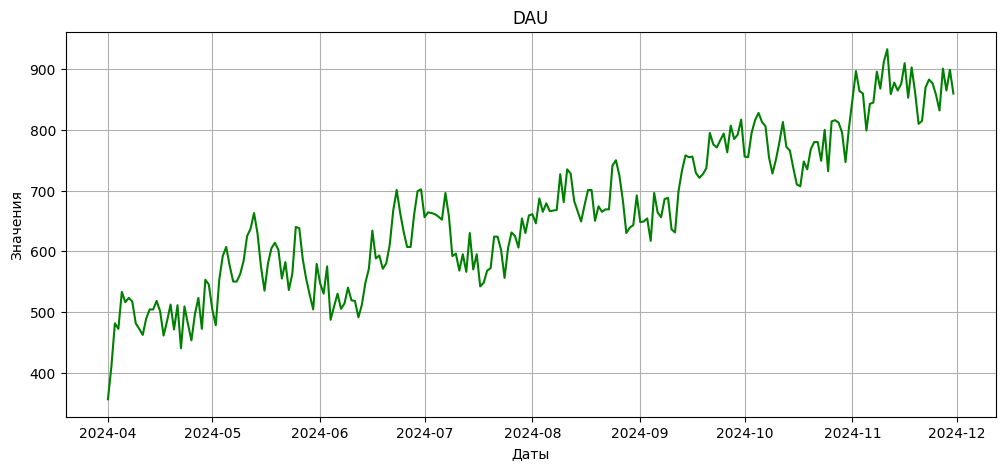

In [25]:
plt.subplots(figsize=(12,5))
plt.plot(dau['day'], dau['dau'], color='green')
plt.title('DAU')
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.grid()
plt.show()

DAU по всем данным постепенно растет

In [26]:
mau = visits.groupby(visits['session_start'].dt.to_period('M'))['user_id'].nunique().reset_index()
mau['session_start'] = mau['session_start'].dt.to_timestamp()
mau.columns = ['month', 'mau']

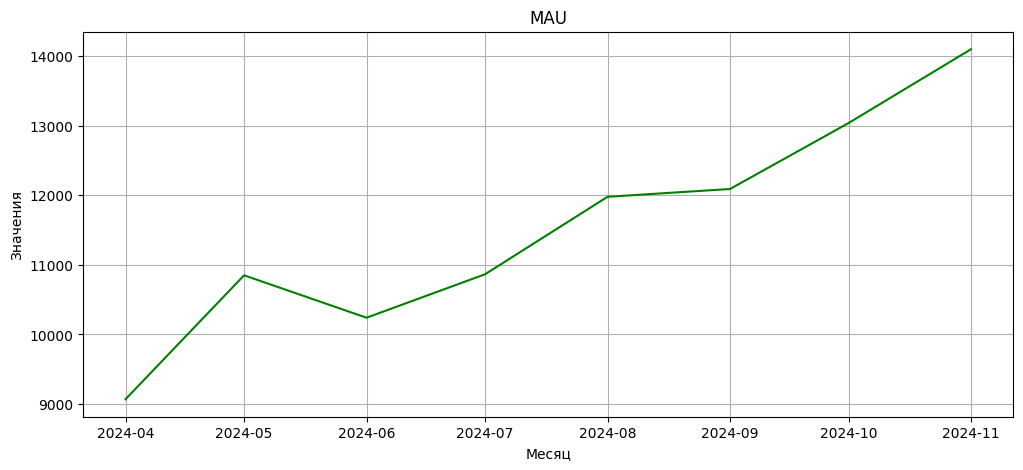

In [27]:
plt.subplots(figsize=(12,5))
plt.plot(mau['month'], mau['mau'], color='green')
plt.title('MAU')
plt.xlabel('Месяц')
plt.ylabel('Значения')
plt.grid()
plt.show()

MAU постепенно растет

In [28]:
dau['day'] = pd.to_datetime(dau['day'])
dau['month'] = dau['day'].dt.to_period('M').dt.to_timestamp()

dau_monthly_average = dau.groupby('month')['dau'].mean().reset_index()

stickiness_table = pd.merge(mau, dau_monthly_average, how='left', on='month')
stickiness_table['stick'] = 100*(stickiness_table['dau']/stickiness_table['mau'])

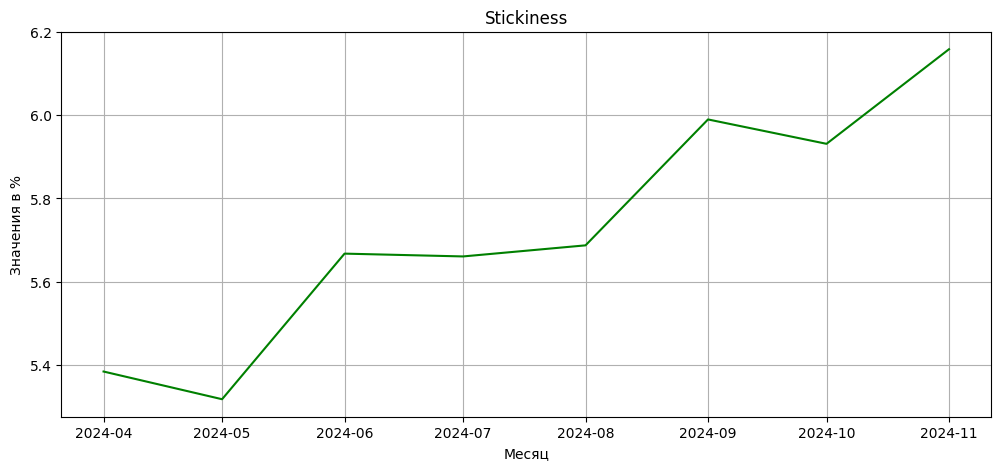

In [29]:
plt.subplots(figsize=(12,5))
plt.plot(stickiness_table['month'], stickiness_table['stick'], color='green')
plt.title('Stickiness')
plt.xlabel('Месяц')
plt.ylabel('Значения в %')
plt.grid()
plt.show()

Коэффициент залипательности не превышает 6,5% и постепенно растет с апреля по ноябрь

#### Задача 2

In [30]:
#costs['month'] = costs['dt'].dt.to_timestamp().dt.to_period('M').dt.to_timestamp()

In [31]:
#costs = costs[costs['month'] < '2024-11-01']

In [32]:
costs_monthly['month'] = costs_monthly['month'].dt.to_timestamp()

In [33]:
costs_monthly = costs_monthly[costs_monthly['month'] < '2024-11-01']

In [34]:
profiles['month'] = profiles['first_dt'].dt.to_period('M').dt.to_timestamp()

In [35]:
all_users = profiles.groupby('month')['user_id'].nunique().reset_index()

In [36]:
cac_monthly = all_users.merge(costs_monthly, on = 'month')

In [37]:
cac_monthly['CAC'] = cac_monthly['costs'] / cac_monthly['user_id']

In [38]:
cac_monthly.head()

,month,user_id,costs,CAC
0,2024-04-01,9069,6663.052333,0.734706
1,2024-05-01,9789,7327.775412,0.748572
2,2024-06-01,8719,8492.116887,0.973978
3,2024-07-01,8742,9217.078561,1.054344
4,2024-08-01,9518,10999.013650,1.155601


In [39]:
#cac_monthly = costs.groupby(['month'])['CAC'].sum().reset_index()

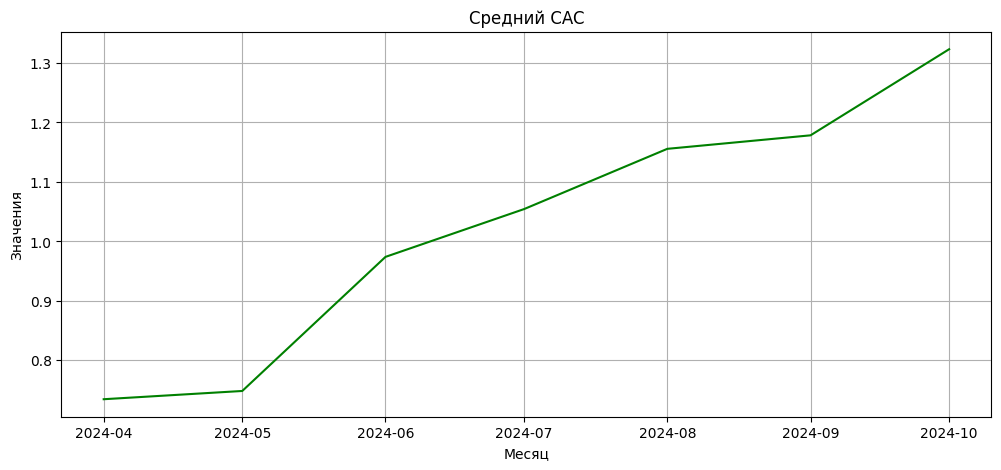

In [40]:
plt.subplots(figsize=(12,5))
plt.plot(cac_monthly['month'], cac_monthly['CAC'], color='green')
plt.title('Средний CAC')
plt.xlabel('Месяц')
plt.ylabel('Значения')
plt.grid()
plt.show()

Средняя стоимость привлечения пользователя растет в течении всего анализируемоего периода

In [41]:
orders_28d = orders[orders['lifetime'] <= 28]

In [42]:
orders_28d['month'] = orders_28d['first_dt'].dt.to_period('M').dt.to_timestamp()

C:\Users\arxip\AppData\Local\Temp\ipykernel_15384\1735955719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_28d['month'] = orders_28d['first_dt'].dt.to_period('M').dt.to_timestamp()


In [43]:
orders_28d = orders_28d[orders_28d['month'] < '2024-11-01']

In [44]:
total_revenue = orders_28d.groupby('month')['revenue'].sum().reset_index()

In [45]:
total_revenue.head()

,month,revenue
0,2024-04-01,7571.19
1,2024-05-01,8266.42
2,2024-06-01,7556.99
3,2024-07-01,10181.38
4,2024-08-01,10584.41


In [46]:
profiles['month'] = profiles['first_dt'].dt.to_period('M').dt.to_timestamp()

In [47]:
#all_users = profiles.groupby('month')['user_id'].nunique().reset_index()

In [48]:
#all_users.head()

In [49]:
ltv_monthly = total_revenue.merge(all_users, on = 'month')

In [50]:
ltv_monthly.head()

,month,revenue,user_id
0,2024-04-01,7571.19,9069
1,2024-05-01,8266.42,9789
2,2024-06-01,7556.99,8719
3,2024-07-01,10181.38,8742
4,2024-08-01,10584.41,9518


In [51]:
ltv_monthly['LTV'] = ltv_monthly['revenue'] / ltv_monthly['user_id'] 

In [52]:
ltv_monthly.head()

,month,revenue,user_id,LTV
0,2024-04-01,7571.19,9069,0.834843
1,2024-05-01,8266.42,9789,0.844460
2,2024-06-01,7556.99,8719,0.866727
3,2024-07-01,10181.38,8742,1.164651
4,2024-08-01,10584.41,9518,1.112041


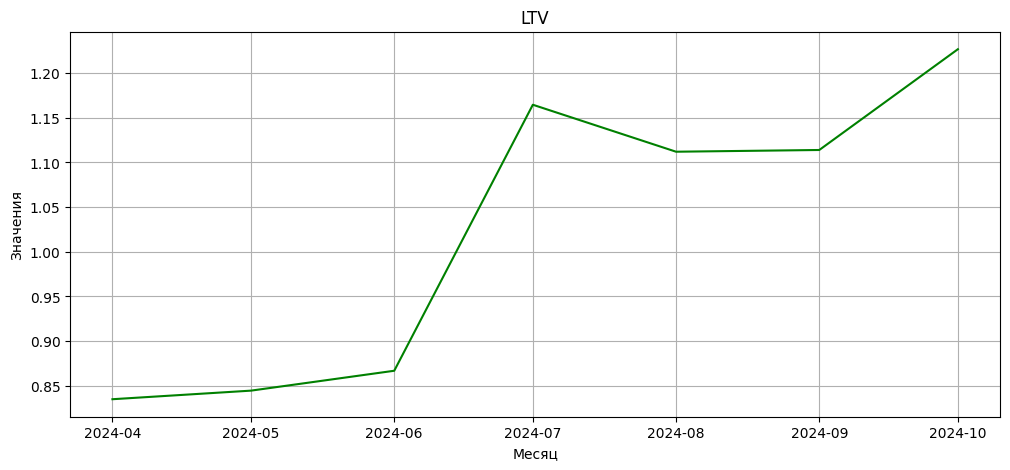

In [53]:
plt.subplots(figsize=(12,5))
plt.plot(ltv_monthly['month'], ltv_monthly['LTV'], color='green')
plt.title('LTV')
plt.xlabel('Месяц')
plt.ylabel('Значения')
plt.grid()
plt.show()

Наблюдается резкий рост LTV после июня, что скорее всего связано с введением нового контента. После июля значение LTV колеблется от 1,1 до 1,2

In [54]:
cac_ltv_monthly = ltv_monthly.merge(cac_monthly, on = 'month')
cac_ltv_monthly.head()

,month,revenue,user_id_x,LTV,user_id_y,costs,CAC
0,2024-04-01,7571.19,9069,0.834843,9069,6663.052333,0.734706
1,2024-05-01,8266.42,9789,0.844460,9789,7327.775412,0.748572
2,2024-06-01,7556.99,8719,0.866727,8719,8492.116887,0.973978
3,2024-07-01,10181.38,8742,1.164651,8742,9217.078561,1.054344
4,2024-08-01,10584.41,9518,1.112041,9518,10999.013650,1.155601


In [55]:
cac_ltv_monthly['ROI'] = (cac_ltv_monthly['LTV'] - cac_ltv_monthly['CAC']) / cac_ltv_monthly['CAC'] * 100

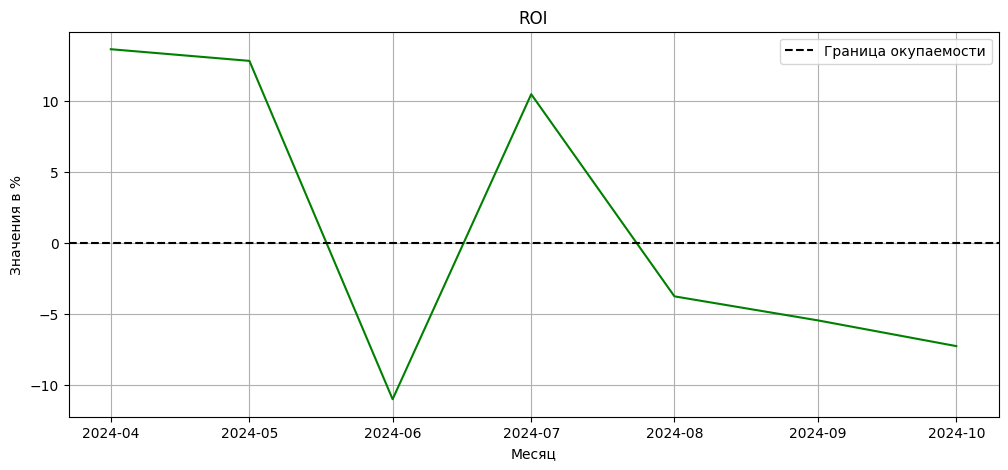

In [56]:
plt.subplots(figsize=(12,5))
plt.plot(cac_ltv_monthly['month'], cac_ltv_monthly['ROI'], color='green')
plt.title('ROI')
plt.xlabel('Месяц')
plt.ylabel('Значения в %')
plt.axhline(y=0, color='black', linestyle='--', label='Граница окупаемости')
plt.legend()
plt.grid()
plt.show()

Видно, что ROI падает в июне, что связано с увеличением САС, а в июле поднимается до 10%, что связано с ростом LTV, что скорее всего связано с новым введеным контентом. Однако начиная с августа наблюдается снова падение ROI, что связано с тем что CAC продолжает расти, а LTV остается в пределах от 1,1 до 1,2.

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


#### Задача 1

In [57]:
channel_summary = profiles.groupby('first_channel')['user_id'].nunique().reset_index()
channel_summary.columns = ['first_channel', 'total_users']
channel_summary = channel_summary.sort_values(by = 'total_users')

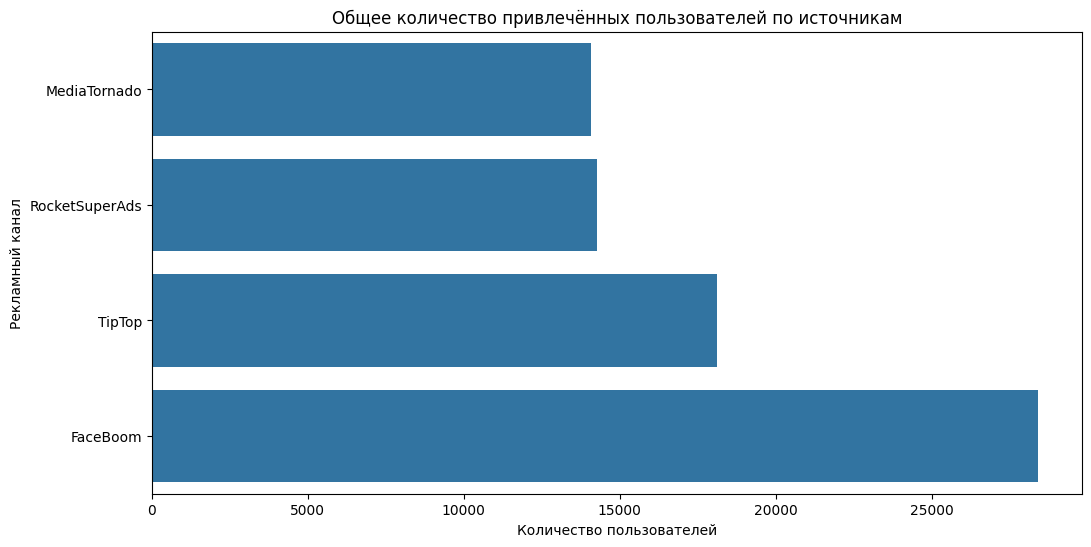

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_users', y='first_channel', data=channel_summary)
plt.title('Общее количество привлечённых пользователей по источникам')
plt.xlabel('Количество пользователей')
plt.ylabel('Рекламный канал')
plt.show()

Наибольшее количество пользователей приходят через канал FaceBoom

In [59]:
daily_new_users = visits.sort_values('session_start').groupby([visits['session_start'].dt.date, 'channel'])['user_id'].nunique().unstack()

In [60]:
daily_new_users.head()

channel,FaceBoom,MediaTornado,RocketSuperAds,TipTop
session_start,,,,
2024-04-01,133,80,70,73
2024-04-02,113,100,96,101
2024-04-03,153,107,111,110
2024-04-04,125,113,130,104
2024-04-05,131,142,146,114


<Figure size 2000x1200 with 0 Axes>

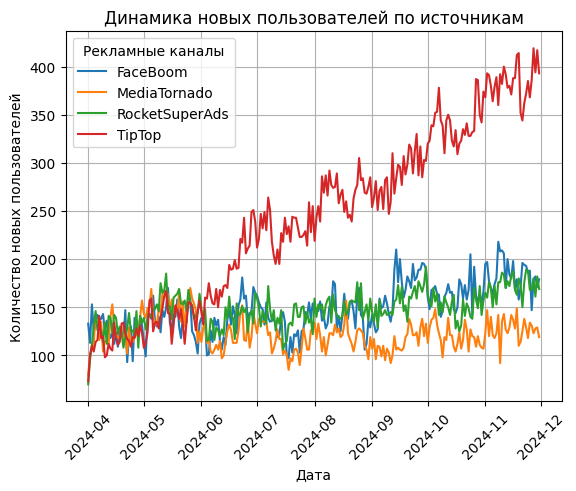

In [61]:
plt.figure(figsize=(20, 12))

daily_new_users.plot()

plt.title('Динамика новых пользователей по источникам')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation = 45)
plt.legend(title='Рекламные каналы')
plt.grid(True)
plt.show()


Динамика пользователей по каналам FaceBoom, MediaTornado и RocketSuperAds остается неизменнной. А вот для канала TipTop наблюдается увеличение числе привлеченных пользователей.

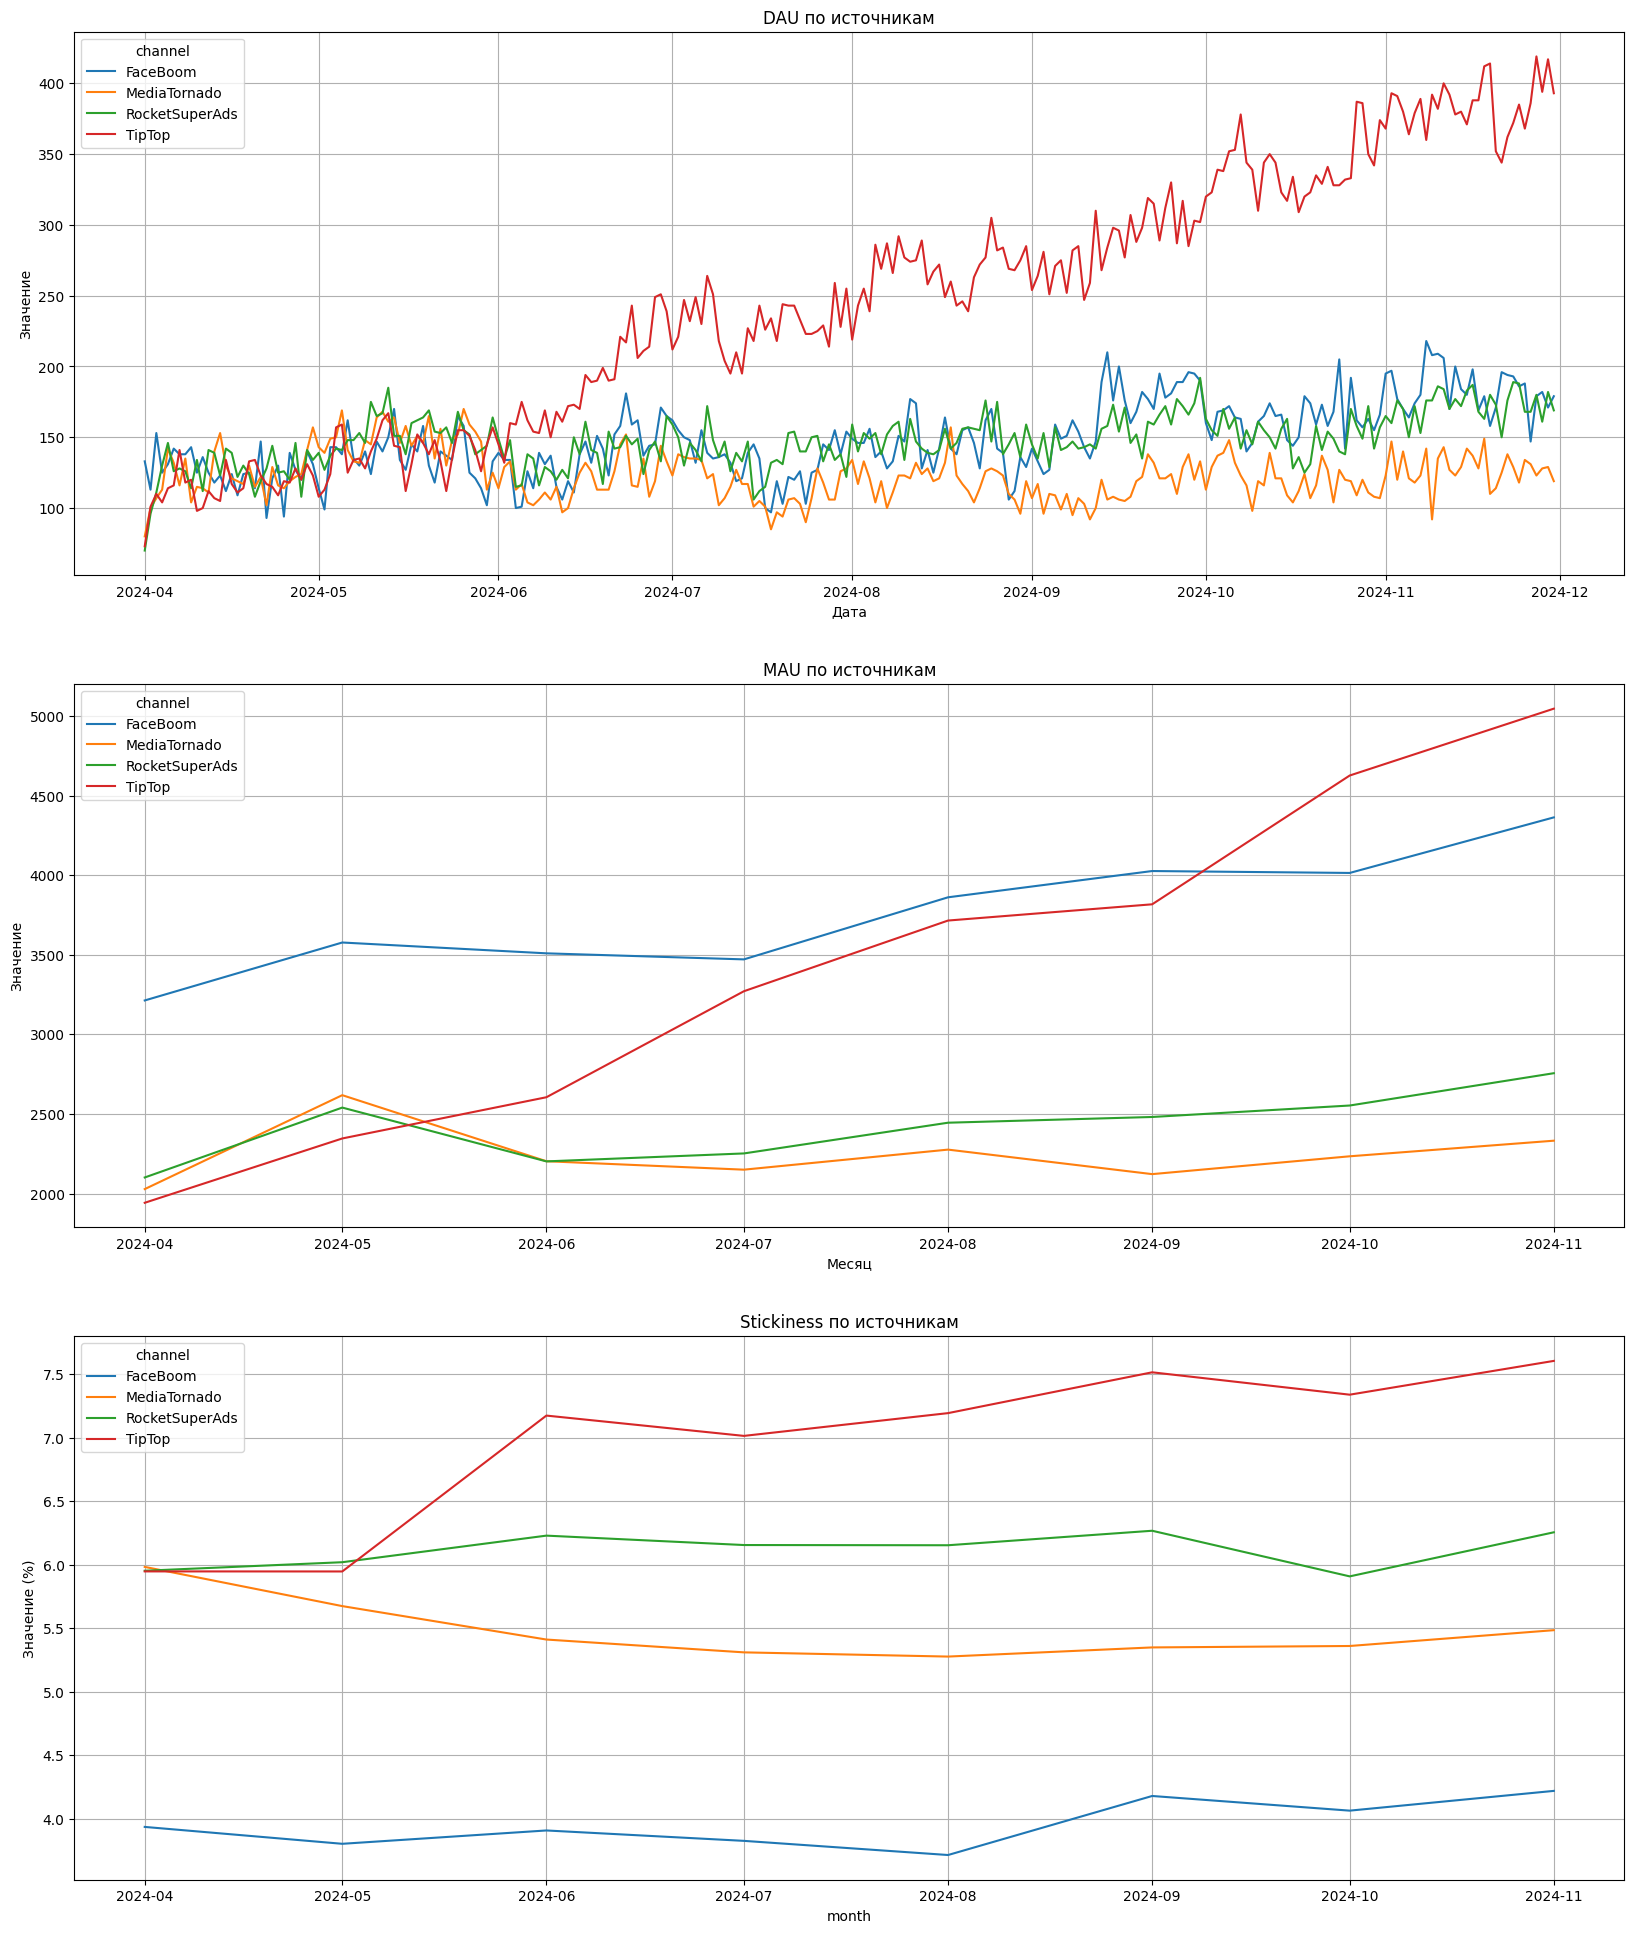

In [62]:
# Расчет DAU по источникам
dau_source = visits.groupby([
    visits['session_start'].dt.date,  
    'channel'
])['user_id'].nunique().reset_index()

dau_source.columns = ['day', 'channel', 'dau']  
dau_source['day'] = pd.to_datetime(dau_source['day'])

# Расчет MAU по источникам
mau_source = visits.groupby([
    visits['session_start'].dt.to_period('M'), 
    'channel'
])['user_id'].nunique().reset_index()

mau_source.columns = ['month', 'channel', 'mau']  
mau_source['month'] = mau_source['month'].dt.to_timestamp()

# Расчет Stickiness

dau_source['month'] = dau_source['day'].dt.to_period('M').dt.to_timestamp()

dau_monthly = dau_source.groupby(['month', 'channel'])['dau'].mean().reset_index()

stickiness = pd.merge(
    mau_source,
    dau_monthly,
    on=['month', 'channel']
)

stickiness['stickiness'] = 100 * stickiness['dau'] / stickiness['mau']

# Визуализация
plt.figure(figsize=(20, 24))

# График DAU
plt.subplot(3, 1, 1)
sns.lineplot(
    data=dau_source,
    x='day',
    y='dau',
    hue='channel'
)
plt.title('DAU по источникам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)


# График MAU
plt.subplot(3, 1, 2)
sns.lineplot(
    data=mau_source,
    x='month',
    y='mau',
    hue='channel'
)
plt.title('MAU по источникам')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.grid(True)


# График Stickiness
plt.subplot(3, 1, 3)
sns.lineplot(
    data=stickiness,
    x='month',
    y='stickiness',
    hue='channel'
)
plt.title('Stickiness по источникам')
plt.ylabel('Значение (%)')
plt.grid(True)
plt.xticks()
plt.show()

- DAU растет для канала TipTop, для остальных каналов остается неизменным.
- MAU для каналов MediaTornado и RocketSuperAds остается почти не изменным, для канала FaceBoom наблюдается небольшое увеличение. Для канала TipTop MAU растет
- Stickiness канала FaceBoom и RocketSuperAds почти не меняется. Наибольший Stickiness наблюдается для канала TipTop. Для канала MediaTornado наблюдается небольшой понижение

#### Задача 2

In [63]:
profiles.head()

,user_id,first_dt,first_channel,day,month
0,26034876,2024-05-29 10:24:00,FaceBoom,2024-05-29,2024-05-01
1,69890364,2024-06-28 05:48:00,RocketSuperAds,2024-06-28,2024-06-01
2,75610104,2024-06-09 06:48:00,FaceBoom,2024-06-09,2024-06-01
3,76692397,2024-10-21 01:51:00,FaceBoom,2024-10-21,2024-10-01
4,80224421,2024-06-21 11:47:00,FaceBoom,2024-06-21,2024-06-01


In [64]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [65]:
df = pd.merge(profiles, visits, on='user_id', how='right')

In [66]:
df = df[df['month'] < '2024-11-01']

In [67]:
df.head()

,user_id,first_dt,first_channel,day,month,region,device,channel,session_start,session_end
0,631105188566,2024-04-01 03:48:00,MediaTornado,2024-04-01,2024-04-01,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,2024-04-01 00:47:00,RocketSuperAds,2024-04-01,2024-04-01,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,2024-04-01 17:31:00,MediaTornado,2024-04-01,2024-04-01,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,2024-04-01 14:36:00,MediaTornado,2024-04-01,2024-04-01,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,2024-04-01 08:25:00,RocketSuperAds,2024-04-01,2024-04-01,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [68]:
df['day_number'] = (df['session_start'] - df['first_dt']).dt.days

df_filtered = df[(df['day_number'] >= 14) & (df['day_number'] <= 28)]

df_filtered.head()

,user_id,first_dt,first_channel,day,month,region,device,channel,session_start,session_end,day_number
7238,409503040345,2024-04-01 08:25:00,RocketSuperAds,2024-04-01,2024-04-01,India,mobile,RocketSuperAds,2024-04-16 16:10:00,2024-04-16 16:44:00,15
7239,418686871482,2024-04-01 19:20:00,RocketSuperAds,2024-04-01,2024-04-01,India,desktop,RocketSuperAds,2024-04-16 13:52:00,2024-04-16 13:56:00,14
7240,601982992004,2024-04-01 19:02:00,MediaTornado,2024-04-01,2024-04-01,India,mobile,MediaTornado,2024-04-16 07:50:00,2024-04-16 09:46:00,14
7241,484138003672,2024-04-01 05:40:00,TipTop,2024-04-01,2024-04-01,India,mobile,TipTop,2024-04-16 20:49:00,2024-04-16 20:54:00,15
7243,505645876193,2024-04-02 04:15:00,RocketSuperAds,2024-04-02,2024-04-01,India,mobile,RocketSuperAds,2024-04-16 13:09:00,2024-04-16 13:11:00,14


In [69]:
df_filtered['cohort_week'] = df_filtered['first_dt'].dt.to_period('W')

C:\Users\arxip\AppData\Local\Temp\ipykernel_15384\1376866005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cohort_week'] = df_filtered['first_dt'].dt.to_period('W')


In [70]:
df_filtered.head()

,user_id,first_dt,first_channel,day,month,region,device,channel,session_start,session_end,day_number,cohort_week
7238,409503040345,2024-04-01 08:25:00,RocketSuperAds,2024-04-01,2024-04-01,India,mobile,RocketSuperAds,2024-04-16 16:10:00,2024-04-16 16:44:00,15,2024-04-01/2024-04-07
7239,418686871482,2024-04-01 19:20:00,RocketSuperAds,2024-04-01,2024-04-01,India,desktop,RocketSuperAds,2024-04-16 13:52:00,2024-04-16 13:56:00,14,2024-04-01/2024-04-07
7240,601982992004,2024-04-01 19:02:00,MediaTornado,2024-04-01,2024-04-01,India,mobile,MediaTornado,2024-04-16 07:50:00,2024-04-16 09:46:00,14,2024-04-01/2024-04-07
7241,484138003672,2024-04-01 05:40:00,TipTop,2024-04-01,2024-04-01,India,mobile,TipTop,2024-04-16 20:49:00,2024-04-16 20:54:00,15,2024-04-01/2024-04-07
7243,505645876193,2024-04-02 04:15:00,RocketSuperAds,2024-04-02,2024-04-01,India,mobile,RocketSuperAds,2024-04-16 13:09:00,2024-04-16 13:11:00,14,2024-04-01/2024-04-07


In [71]:
active_users = df_filtered[['cohort_week', 'first_channel', 'user_id']].groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
active_users.head()

,cohort_week,first_channel,user_id
0,2024-04-01/2024-04-07,FaceBoom,9
1,2024-04-01/2024-04-07,MediaTornado,46
2,2024-04-01/2024-04-07,RocketSuperAds,66
3,2024-04-01/2024-04-07,TipTop,63
4,2024-04-08/2024-04-14,FaceBoom,11


In [72]:
profiles_filtered = profiles[profiles['month'] < '2024-11-01']

In [73]:
profiles_filtered['cohort_week'] = profiles_filtered['first_dt'].dt.to_period('W')

C:\Users\arxip\AppData\Local\Temp\ipykernel_15384\3289802398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles_filtered['cohort_week'] = profiles_filtered['first_dt'].dt.to_period('W')


In [74]:
total_users = profiles_filtered[['cohort_week', 'first_channel', 'user_id']].groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
total_users.head()

,cohort_week,first_channel,user_id
0,2024-04-01/2024-04-07,FaceBoom,820
1,2024-04-01/2024-04-07,MediaTornado,522
2,2024-04-01/2024-04-07,RocketSuperAds,542
3,2024-04-01/2024-04-07,TipTop,516
4,2024-04-08/2024-04-14,FaceBoom,749


In [75]:
df_rr = active_users.merge(total_users, on = ['cohort_week', 'first_channel'])
df_rr['retention_rate'] = df_rr['user_id_x'] / df_rr['user_id_y'] * 100

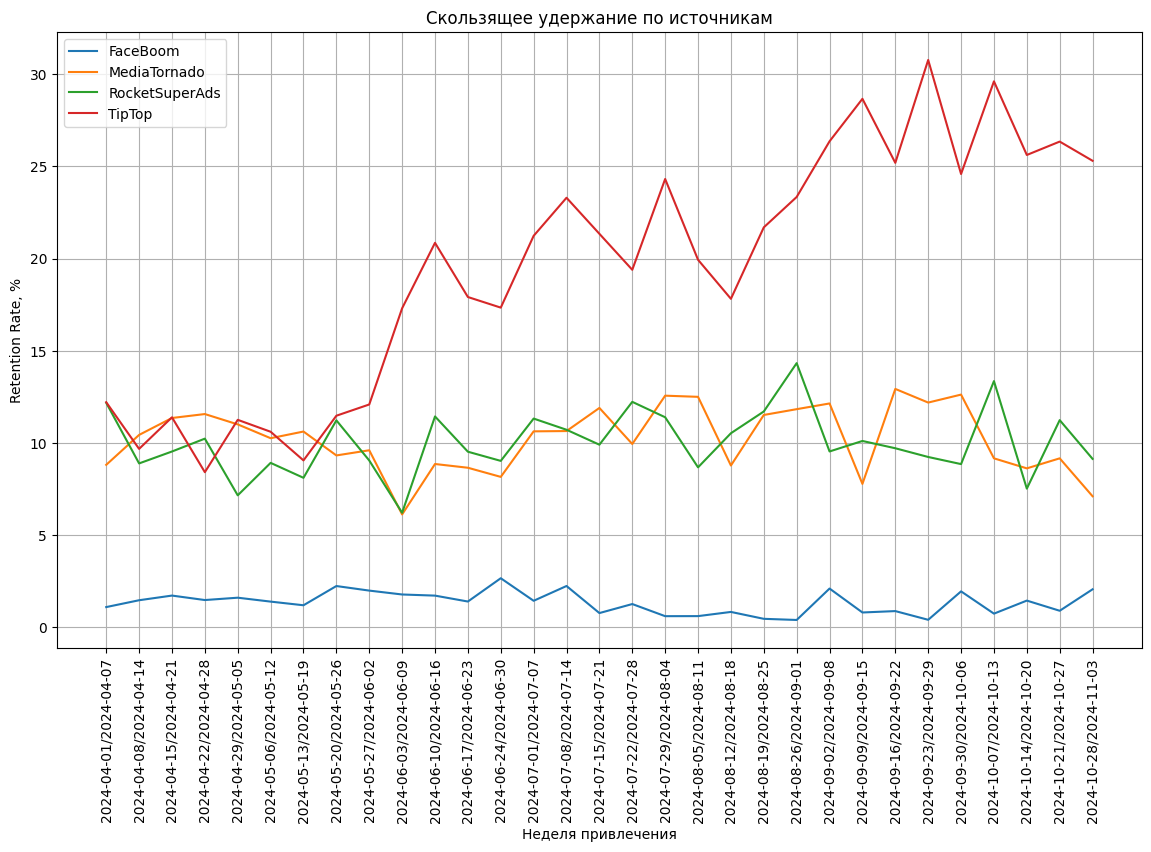

In [76]:
plt.figure(figsize=(14, 8))
for channel in df_rr['first_channel'].unique():
    channel_data = df_rr[df_rr['first_channel'] == channel]
    plt.plot(channel_data['cohort_week'].astype(str), 
             channel_data['retention_rate'], 
             label=channel)

plt.title('Скользящее удержание по источникам')
plt.xlabel('Неделя привлечения')
plt.xticks(rotation = 90)
plt.ylabel('Retention Rate, %')
plt.legend()
plt.grid(True)
plt.show()

-Самое низкое удержание (меньше 5 %) наблюдается для канала привлечения FaceBoom
-Удержание для каналов MediaTornado и RocketSuperAds остается стабильным на уровне от 7 до 14 %
-Удержание для пользователей с канала привлечения TipTop растет начиная с июня

In [77]:
df_filtered28 = df[(df['day_number'] < 28)]
df_filtered28.head()

,user_id,first_dt,first_channel,day,month,region,device,channel,session_start,session_end,day_number
0,631105188566,2024-04-01 03:48:00,MediaTornado,2024-04-01,2024-04-01,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00,0
1,892885906464,2024-04-01 00:47:00,RocketSuperAds,2024-04-01,2024-04-01,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00,0
2,517003690029,2024-04-01 17:31:00,MediaTornado,2024-04-01,2024-04-01,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00,0
3,185156659289,2024-04-01 14:36:00,MediaTornado,2024-04-01,2024-04-01,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00,0
4,409503040345,2024-04-01 08:25:00,RocketSuperAds,2024-04-01,2024-04-01,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00,0


In [78]:
conversion = pd.merge(df_filtered28, orders_28d, on=['user_id', 'first_channel', 'first_dt'], how='left')
conversion['cohort_week'] = conversion['first_dt'].dt.to_period('W')

total_users = conversion.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()

purchase_users = conversion[conversion['revenue'] > 0].groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()


conv = total_users.merge(purchase_users, on=['cohort_week', 'first_channel'], how='left')
conv['CR'] = conv['user_id_y'] / conv['user_id_x'] * 100

conv.head()

,cohort_week,first_channel,user_id_x,user_id_y,CR
0,2024-04-01/2024-04-07,FaceBoom,820,93,11.341463
1,2024-04-01/2024-04-07,MediaTornado,522,24,4.597701
2,2024-04-01/2024-04-07,RocketSuperAds,542,45,8.302583
3,2024-04-01/2024-04-07,TipTop,516,48,9.302326
4,2024-04-08/2024-04-14,FaceBoom,749,78,10.413885


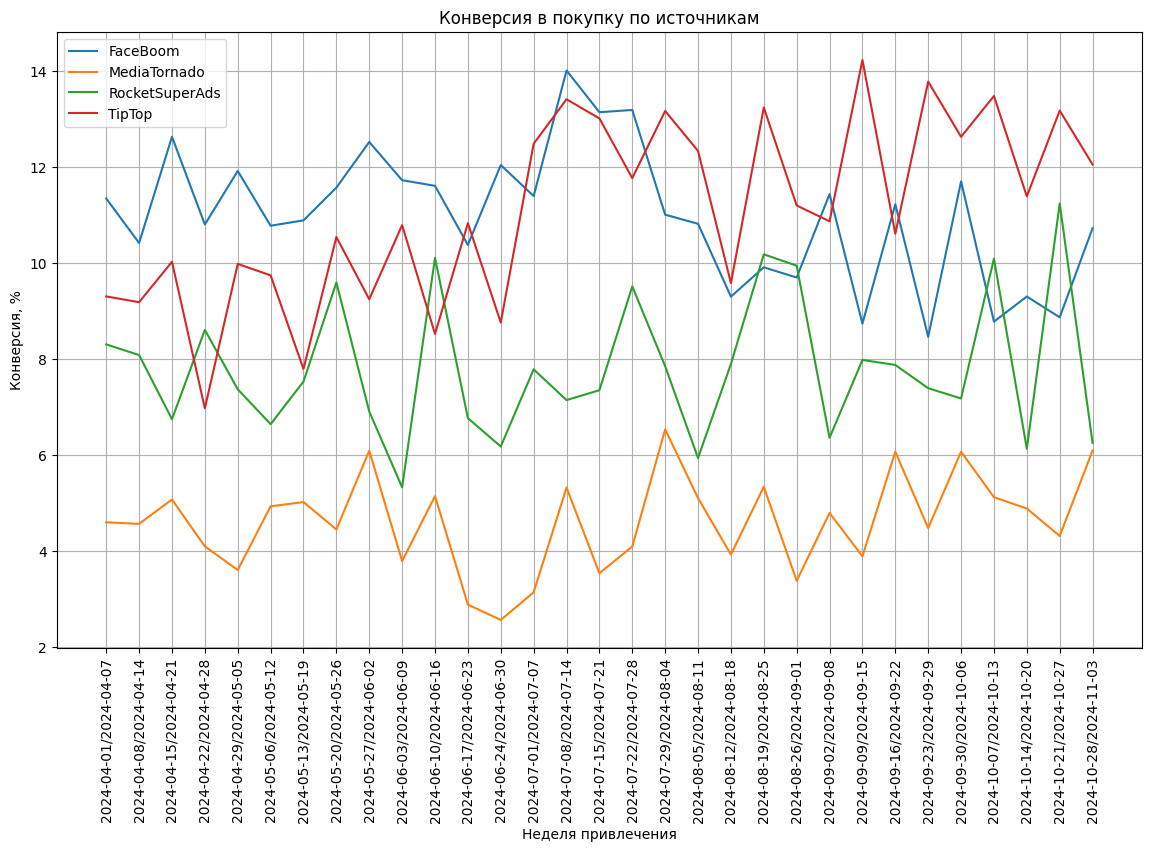

In [79]:
# Визуализация
plt.figure(figsize=(14, 8))
for channel in conv['first_channel'].unique():
    channel_data = conv[conv['first_channel'] == channel]
    plt.plot(channel_data['cohort_week'].astype(str), 
             channel_data['CR'], 
             label=channel)

plt.title('Конверсия в покупку по источникам')
plt.xlabel('Неделя привлечения')
plt.xticks(rotation = 90)
plt.ylabel('Конверсия, %')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
costs.head()

,dt,channel,costs,day,first_channel,unique_users,CAC,month,cohort_week
0,2024-04-01,FaceBoom,124.938874,2024-04-01,FaceBoom,133,0.939390,2024-04,2024-04-01/2024-04-07
1,2024-04-02,FaceBoom,88.147779,2024-04-02,FaceBoom,94,0.937742,2024-04,2024-04-01/2024-04-07
2,2024-04-03,FaceBoom,120.779457,2024-04-03,FaceBoom,133,0.908116,2024-04,2024-04-01/2024-04-07
3,2024-04-04,FaceBoom,98.981253,2024-04-04,FaceBoom,105,0.942679,2024-04,2024-04-01/2024-04-07
4,2024-04-05,FaceBoom,109.044760,2024-04-05,FaceBoom,110,0.991316,2024-04,2024-04-01/2024-04-07


In [81]:
costs['cohort_week'] = costs['dt'].dt.to_timestamp().dt.to_period('W')

In [82]:
costs_week = costs.groupby(['cohort_week', 'first_channel'])['costs'].sum().reset_index()
costs_week.head()

,cohort_week,first_channel,costs
0,2024-04-01/2024-04-07,FaceBoom,769.875901
1,2024-04-01/2024-04-07,MediaTornado,129.318322
2,2024-04-01/2024-04-07,RocketSuperAds,466.650000
3,2024-04-01/2024-04-07,TipTop,393.989381
4,2024-04-08/2024-04-14,FaceBoom,698.872741


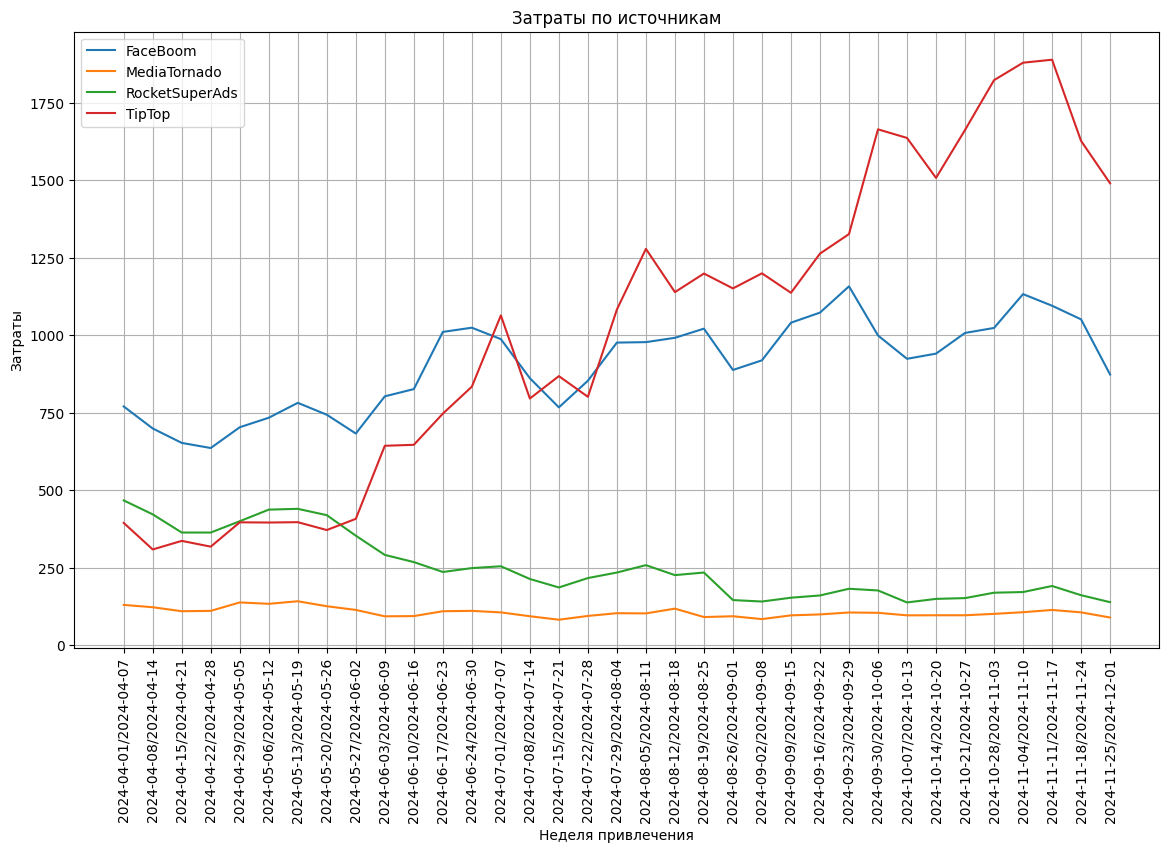

In [83]:
plt.figure(figsize=(14, 8))
for channel in conv['first_channel'].unique():
    channel_data = costs_week[costs_week['first_channel'] == channel]
    plt.plot(channel_data['cohort_week'].astype(str), 
             channel_data['costs'], 
             label=channel)

plt.title('Затраты по источникам')
plt.xlabel('Неделя привлечения')
plt.xticks(rotation = 90)
plt.ylabel('Затраты')
plt.legend()
plt.grid(True)
plt.show()

Можно сказать, что затраты на каналы привлечения FaceBoom, MediaTornado, RocketSuperAds стабильны, а затраты на канал привлечения TipTop растут начиная с июня

In [84]:
cac_week = total_users.merge(costs_week, on = ['cohort_week' , 'first_channel'])
cac_week.head()

,cohort_week,first_channel,user_id,costs
0,2024-04-01/2024-04-07,FaceBoom,820,769.875901
1,2024-04-01/2024-04-07,MediaTornado,522,129.318322
2,2024-04-01/2024-04-07,RocketSuperAds,542,466.650000
3,2024-04-01/2024-04-07,TipTop,516,393.989381
4,2024-04-08/2024-04-14,FaceBoom,749,698.872741


In [85]:
cac_week['CAC'] = cac_week['costs'] / cac_week['user_id']

In [86]:
orders_28d['cohort_week'] = orders_28d['first_dt'].dt.to_period('W')

In [87]:
orders_28d.head()

,user_id,event_dt,revenue,first_dt,first_channel,day,lifetime,month,cohort_week
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01 05:56:00,FaceBoom,2024-04-01,0,2024-04-01,2024-04-01/2024-04-07
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01 14:54:00,FaceBoom,2024-04-01,0,2024-04-01,2024-04-01/2024-04-07
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01 22:14:00,FaceBoom,2024-04-01,0,2024-04-01,2024-04-01/2024-04-07
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01 06:05:00,TipTop,2024-04-01,0,2024-04-01,2024-04-01/2024-04-07
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01 01:19:00,FaceBoom,2024-04-01,0,2024-04-01,2024-04-01/2024-04-07


In [88]:
total_revenue = orders_28d.groupby(['cohort_week' , 'first_channel'])['revenue'].sum().reset_index()
total_revenue.head()

,cohort_week,first_channel,revenue
0,2024-04-01/2024-04-07,FaceBoom,380.36
1,2024-04-01/2024-04-07,MediaTornado,191.43
2,2024-04-01/2024-04-07,RocketSuperAds,739.28
3,2024-04-01/2024-04-07,TipTop,801.38
4,2024-04-08/2024-04-14,FaceBoom,337.06


In [89]:
ltv_week = total_users.merge(total_revenue, on = ['cohort_week' , 'first_channel'])
ltv_week.head()

,cohort_week,first_channel,user_id,revenue
0,2024-04-01/2024-04-07,FaceBoom,820,380.36
1,2024-04-01/2024-04-07,MediaTornado,522,191.43
2,2024-04-01/2024-04-07,RocketSuperAds,542,739.28
3,2024-04-01/2024-04-07,TipTop,516,801.38
4,2024-04-08/2024-04-14,FaceBoom,749,337.06


In [90]:
ltv_week['LTV'] = ltv_week['revenue'] / ltv_week['user_id']
ltv_week.head()

,cohort_week,first_channel,user_id,revenue,LTV
0,2024-04-01/2024-04-07,FaceBoom,820,380.36,0.463854
1,2024-04-01/2024-04-07,MediaTornado,522,191.43,0.366724
2,2024-04-01/2024-04-07,RocketSuperAds,542,739.28,1.363985
3,2024-04-01/2024-04-07,TipTop,516,801.38,1.553062
4,2024-04-08/2024-04-14,FaceBoom,749,337.06,0.450013


In [91]:
ltv_cac = ltv_week[['cohort_week', 'first_channel', 'LTV']].merge(cac_week[['cohort_week', 'first_channel', 'CAC']], on = ['cohort_week', 'first_channel'])
ltv_cac['ROI'] = (ltv_cac['LTV'] - ltv_cac['CAC']) / ltv_cac['CAC'] * 100
ltv_cac.head()

,cohort_week,first_channel,LTV,CAC,ROI
0,2024-04-01/2024-04-07,FaceBoom,0.463854,0.938873,-50.594635
1,2024-04-01/2024-04-07,MediaTornado,0.366724,0.247736,48.030068
2,2024-04-01/2024-04-07,RocketSuperAds,1.363985,0.860978,58.422801
3,2024-04-01/2024-04-07,TipTop,1.553062,0.763545,103.401421
4,2024-04-08/2024-04-14,FaceBoom,0.450013,0.933074,-51.770905


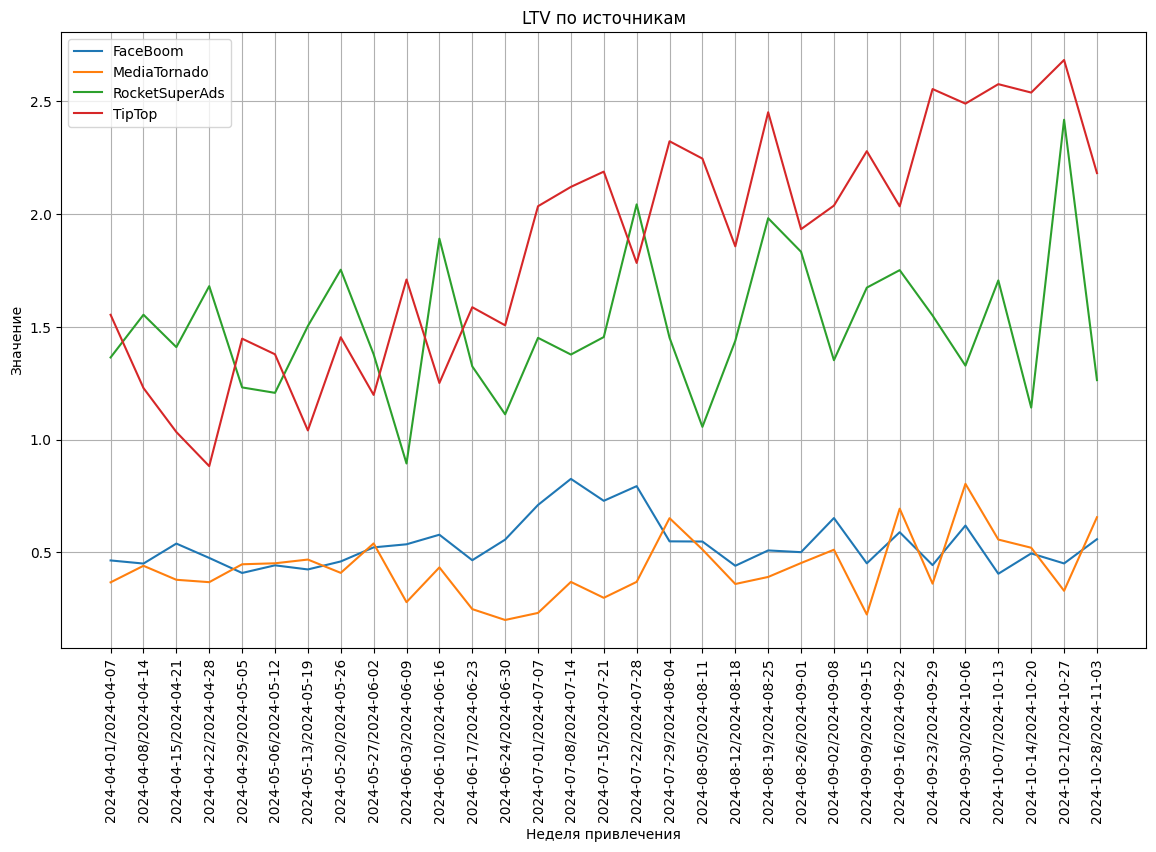

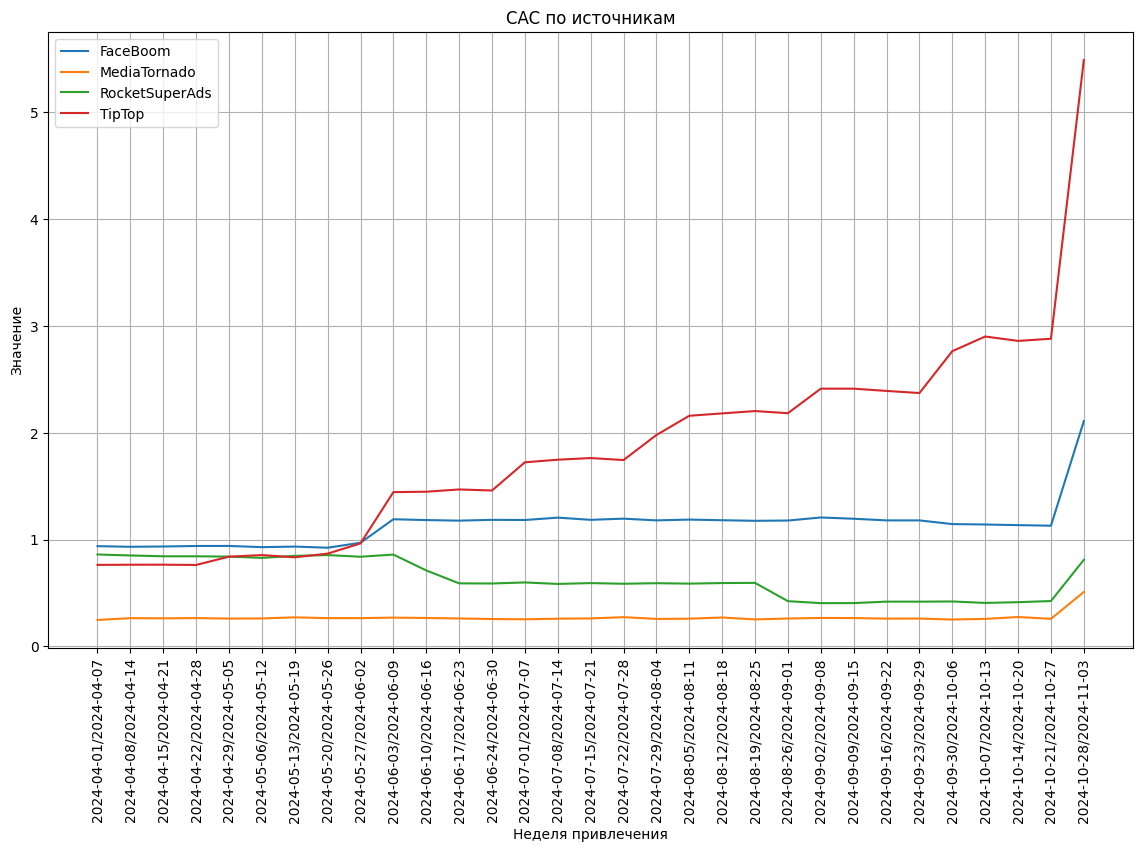

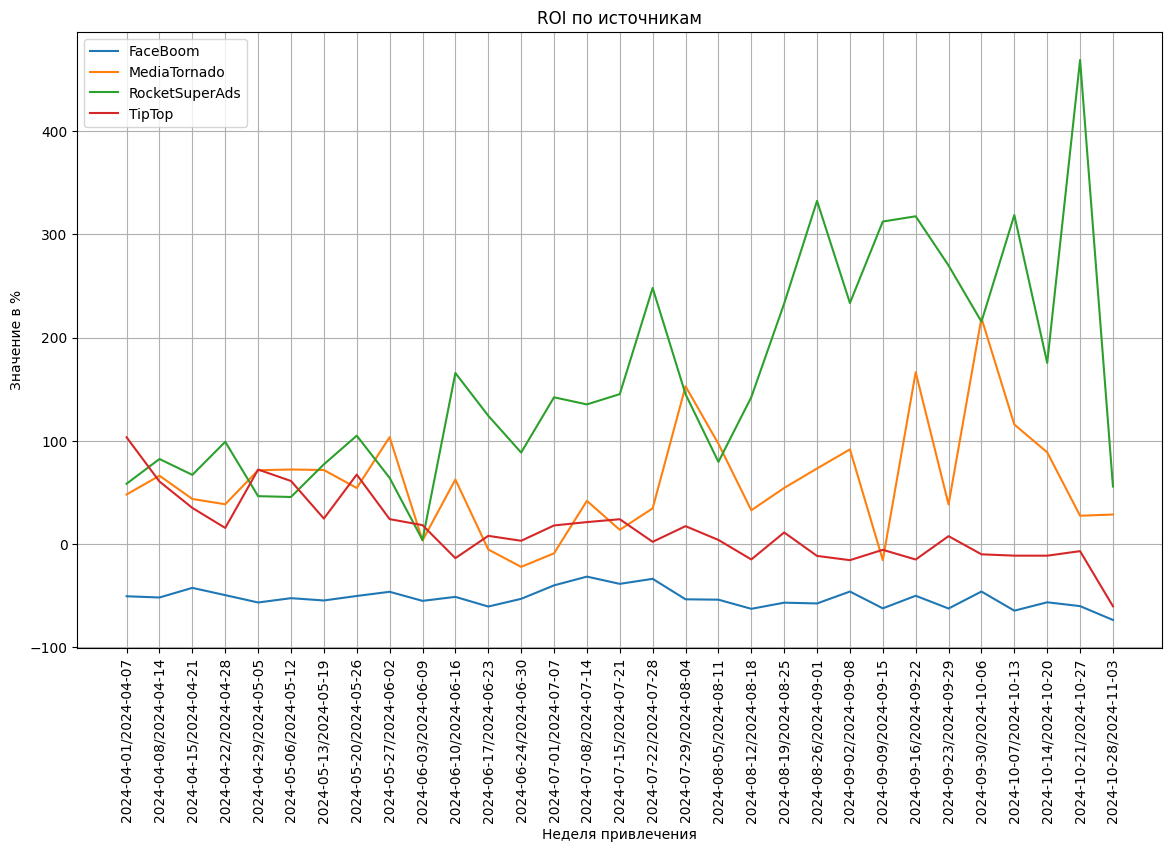

In [92]:
plt.figure(figsize=(14, 8))
for channel in ltv_cac['first_channel'].unique():
    ltv_cac_data = ltv_cac[ltv_cac['first_channel'] == channel]
    plt.plot(ltv_cac_data['cohort_week'].astype(str), 
             ltv_cac_data['LTV'], 
             label=channel)

plt.title('LTV по источникам')
plt.xlabel('Неделя привлечения')
plt.xticks(rotation = 90)
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
for channel in ltv_cac['first_channel'].unique():
    ltv_cac_data = ltv_cac[ltv_cac['first_channel'] == channel]
    plt.plot(ltv_cac_data['cohort_week'].astype(str), 
             ltv_cac_data['CAC'], 
             label=channel)

plt.title('CAC по источникам')
plt.xlabel('Неделя привлечения')
plt.xticks(rotation = 90)
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
for channel in ltv_cac['first_channel'].unique():
    ltv_cac_data = ltv_cac[ltv_cac['first_channel'] == channel]
    plt.plot(ltv_cac_data['cohort_week'].astype(str), 
             ltv_cac_data['ROI'], 
             label=channel)

plt.title('ROI по источникам')
plt.xlabel('Неделя привлечения')
plt.xticks(rotation = 90)
plt.ylabel('Значение в %')
plt.legend()
plt.grid(True)
plt.show()

Видно, что канал FaceBoom приносит убыток. С июня месяца растет прибыль с канала RocketSuperAds, прибыль с канала MediaTornado можно считать стабильной. Прибыль с канала TipTop падает начиная с июня и к концу анализируемого периода канал становится убыточным

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

In [93]:
orders.head()

,user_id,event_dt,revenue,first_dt,first_channel,day,lifetime
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01 05:56:00,FaceBoom,2024-04-01,0
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01 14:54:00,FaceBoom,2024-04-01,0
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01 22:14:00,FaceBoom,2024-04-01,0
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01 06:05:00,TipTop,2024-04-01,0
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01 01:19:00,FaceBoom,2024-04-01,0


In [95]:
orders['cohort_week'] = orders['first_dt'].dt.to_period('W').dt.start_time
orders['observation_date'] = orders['event_dt'].dt.to_period('W').dt.start_time

orders['n_week'] = (
    (orders['observation_date'] - orders['cohort_week'])
    / pd.Timedelta(weeks=1)
).astype(int)

orders['cohort_week'] = orders['first_dt'].dt.to_period('W')
orders['observation_week'] = orders['event_dt'].dt.to_period('W')

orders.head()

,user_id,event_dt,revenue,first_dt,first_channel,day,lifetime,cohort_week,observation_date,n_week,observation_week
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01 05:56:00,FaceBoom,2024-04-01,0,2024-04-01/2024-04-07,2024-04-01,0,2024-04-01/2024-04-07
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01 14:54:00,FaceBoom,2024-04-01,0,2024-04-01/2024-04-07,2024-04-01,0,2024-04-01/2024-04-07
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01 22:14:00,FaceBoom,2024-04-01,0,2024-04-01/2024-04-07,2024-04-01,0,2024-04-01/2024-04-07
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01 06:05:00,TipTop,2024-04-01,0,2024-04-01/2024-04-07,2024-04-01,0,2024-04-01/2024-04-07
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01 01:19:00,FaceBoom,2024-04-01,0,2024-04-01/2024-04-07,2024-04-01,0,2024-04-01/2024-04-07


In [96]:
orders_filtered = orders[(orders['first_channel'] == 'FaceBoom') | 
                        (orders['first_channel'] == 'TipTop')]
total_revenue = orders_filtered.groupby(['cohort_week' , 'n_week', 'first_channel'])['revenue'].sum().reset_index()
total_revenue.head()

,cohort_week,n_week,first_channel,revenue
0,2024-04-01/2024-04-07,0,FaceBoom,290.63
1,2024-04-01/2024-04-07,0,TipTop,272.76
2,2024-04-01/2024-04-07,1,FaceBoom,62.81
3,2024-04-01/2024-04-07,1,TipTop,221.46
4,2024-04-01/2024-04-07,2,FaceBoom,20.94


In [97]:
df = profiles[['user_id', 'first_dt', 'first_channel']].merge(visits[['user_id', 'session_start']], on = 'user_id', how = 'right')
df.head()

,user_id,first_dt,first_channel,session_start
0,631105188566,2024-04-01 03:48:00,MediaTornado,2024-04-01 03:48:00
1,892885906464,2024-04-01 00:47:00,RocketSuperAds,2024-04-01 00:47:00
2,517003690029,2024-04-01 17:31:00,MediaTornado,2024-04-01 17:31:00
3,185156659289,2024-04-01 14:36:00,MediaTornado,2024-04-01 14:36:00
4,409503040345,2024-04-01 08:25:00,RocketSuperAds,2024-04-01 08:25:00


In [98]:
df['cohort_week'] = df['first_dt'].dt.to_period('W').dt.start_time
df['observation_date'] = df['session_start'].dt.to_period('W').dt.start_time

df['n_week'] = (
    (df['observation_date'] - df['cohort_week'])
    / pd.Timedelta(weeks=1)
).astype(int)

df['cohort_week'] = df['first_dt'].dt.to_period('W')
df.head()

,user_id,first_dt,first_channel,session_start,cohort_week,observation_date,n_week
0,631105188566,2024-04-01 03:48:00,MediaTornado,2024-04-01 03:48:00,2024-04-01/2024-04-07,2024-04-01,0
1,892885906464,2024-04-01 00:47:00,RocketSuperAds,2024-04-01 00:47:00,2024-04-01/2024-04-07,2024-04-01,0
2,517003690029,2024-04-01 17:31:00,MediaTornado,2024-04-01 17:31:00,2024-04-01/2024-04-07,2024-04-01,0
3,185156659289,2024-04-01 14:36:00,MediaTornado,2024-04-01 14:36:00,2024-04-01/2024-04-07,2024-04-01,0
4,409503040345,2024-04-01 08:25:00,RocketSuperAds,2024-04-01 08:25:00,2024-04-01/2024-04-07,2024-04-01,0


In [99]:
df_filtered = df[(df['first_channel'] == 'FaceBoom') | 
                        (df['first_channel'] == 'TipTop')]
total_users = df_filtered.groupby(['cohort_week' , 'n_week', 'first_channel'])['user_id'].nunique().reset_index()
total_users.head()

,cohort_week,n_week,first_channel,user_id
0,2024-04-01/2024-04-07,0,FaceBoom,820
1,2024-04-01/2024-04-07,0,TipTop,516
2,2024-04-01/2024-04-07,1,FaceBoom,59
3,2024-04-01/2024-04-07,1,TipTop,121
4,2024-04-01/2024-04-07,2,FaceBoom,18


In [100]:
ltv_week = total_users.merge(total_revenue, on = ['cohort_week' , 'first_channel', 'n_week'])
ltv_week['LTV'] = ltv_week['revenue'] / ltv_week['user_id']
ltv_cac = ltv_week[['cohort_week', 'first_channel', 'LTV', 'n_week']].merge(cac_week[['cohort_week', 'first_channel', 'CAC']], on = ['cohort_week', 'first_channel'])
ltv_cac['ROI'] = (ltv_cac['LTV'] - ltv_cac['CAC']) / ltv_cac['CAC'] * 100
ltv_cac.head()

,cohort_week,first_channel,LTV,n_week,CAC,ROI
0,2024-04-01/2024-04-07,FaceBoom,0.354427,0,0.938873,-62.249760
1,2024-04-01/2024-04-07,TipTop,0.528605,0,0.763545,-30.769708
2,2024-04-01/2024-04-07,FaceBoom,1.064576,1,0.938873,13.388735
3,2024-04-01/2024-04-07,TipTop,1.830248,1,0.763545,139.703906
4,2024-04-01/2024-04-07,FaceBoom,1.163333,2,0.938873,23.907416


In [101]:
ltv_cac_FB = ltv_cac[ltv_cac['first_channel'] == 'FaceBoom'].sort_values(by = 'n_week')

In [102]:
ltv_cac_FB = ltv_cac_FB[ltv_cac_FB['n_week'] <= 10]

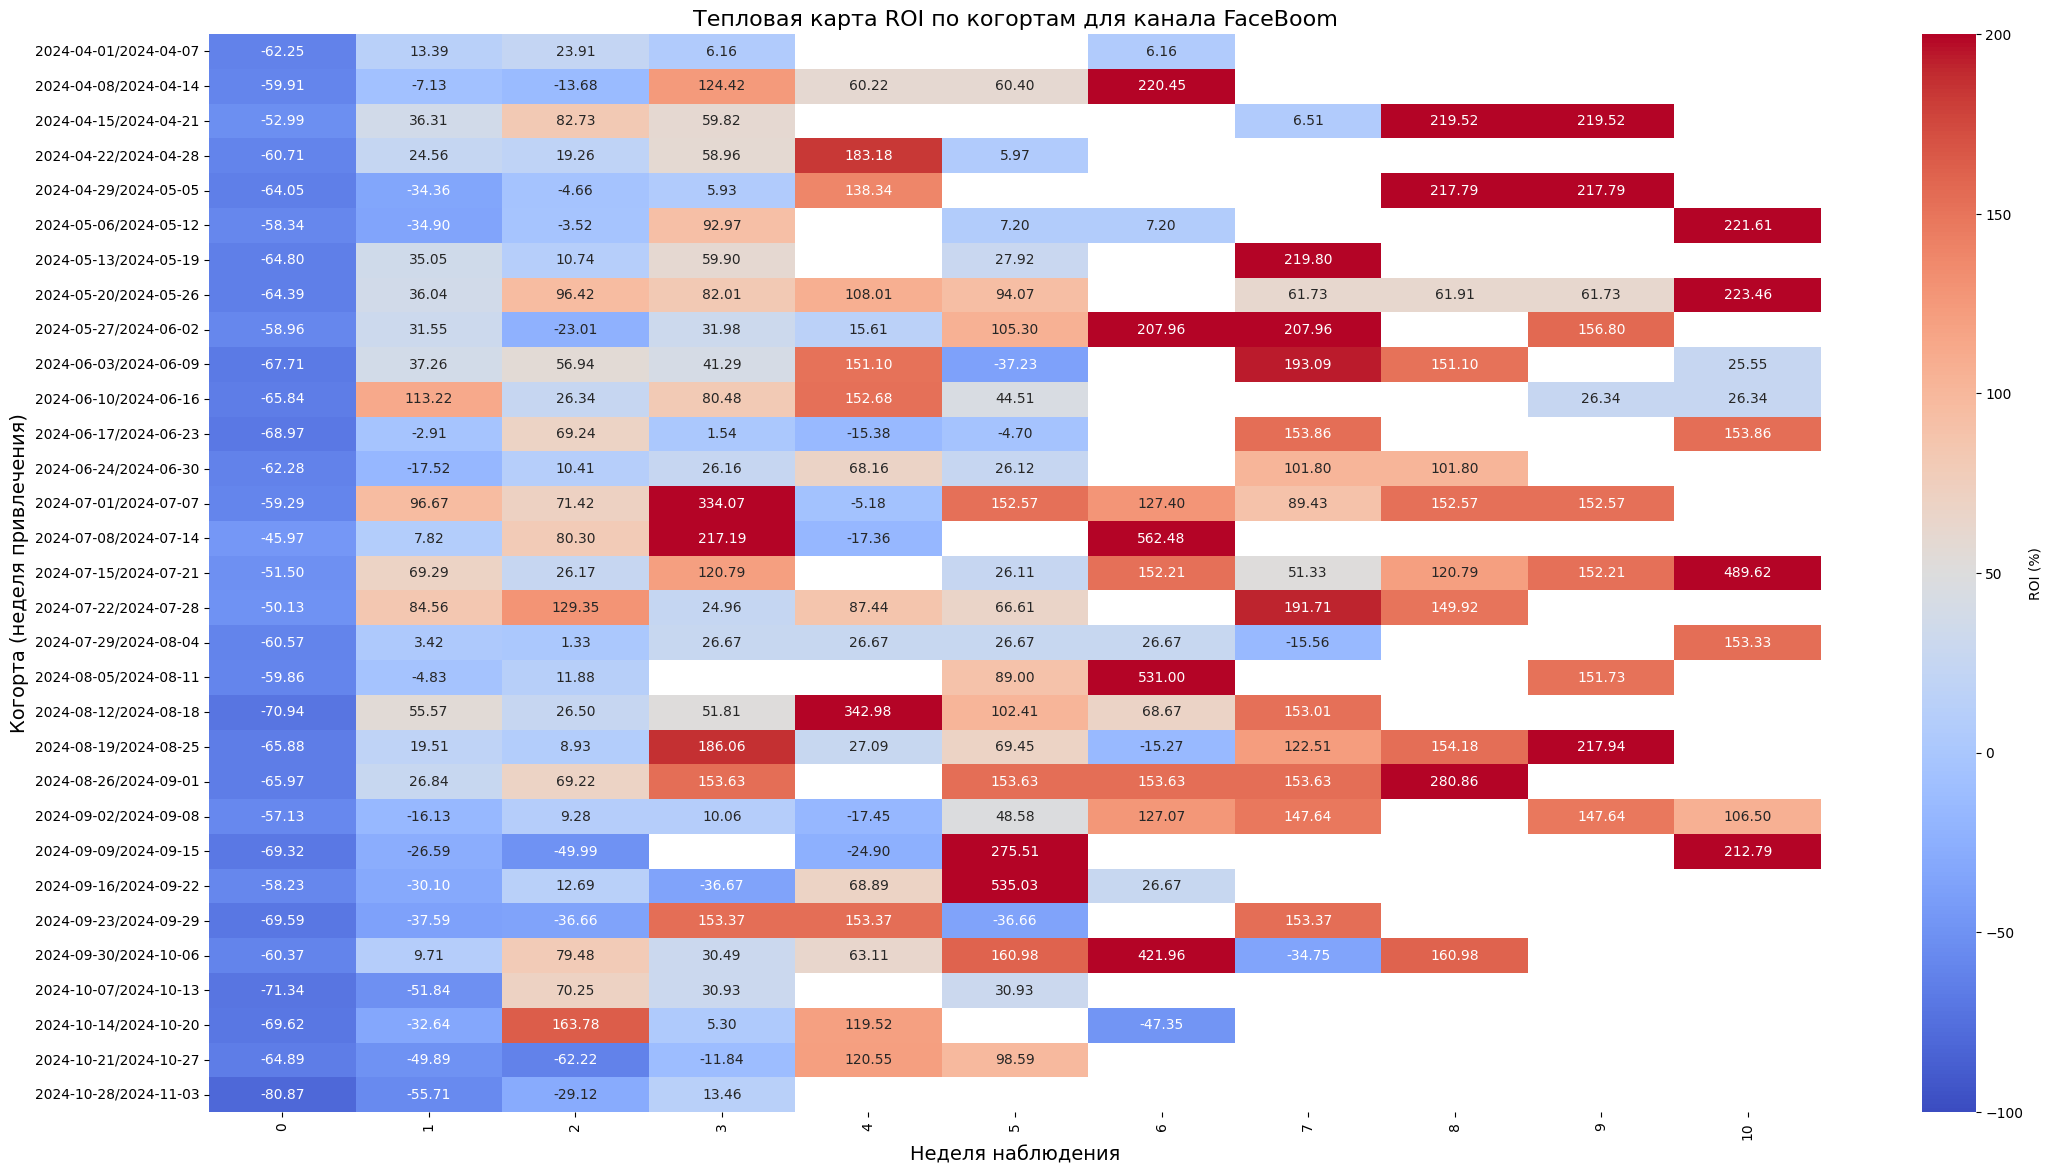

In [103]:
ltv_cac_FB['cohort_week'] = ltv_cac_FB['cohort_week'].astype(str)


pivot_table = ltv_cac_FB.pivot_table(
    values='ROI',
    index='cohort_week',
    columns='n_week'
)

plt.figure(figsize=(26, 14))

heatmap = sns.heatmap(
    pivot_table,
    annot=True,                    
    fmt='.2f',                     
    cmap='coolwarm',              
    cbar_kws={'label': 'ROI (%)'}, 
    vmin=-100,                    
    vmax=200                      
)


plt.title('Тепловая карта ROI по когортам для канала FaceBoom', fontsize=16)
plt.xlabel('Неделя наблюдения', fontsize=14)
plt.ylabel('Когорта (неделя привлечения)', fontsize=14)
plt.xticks(rotation=90)
plt.show()


ROI для канала привлечения FaceBoom не стабильный. Для некоторых когорт окупаемость наступает спустя 2 недели, для других через больший период.

In [104]:
ltv_cac_TT = ltv_cac[ltv_cac['first_channel'] == 'TipTop'].sort_values(by = 'n_week')

In [105]:
ltv_cac_TT = ltv_cac_TT[ltv_cac_TT['n_week'] <= 10]

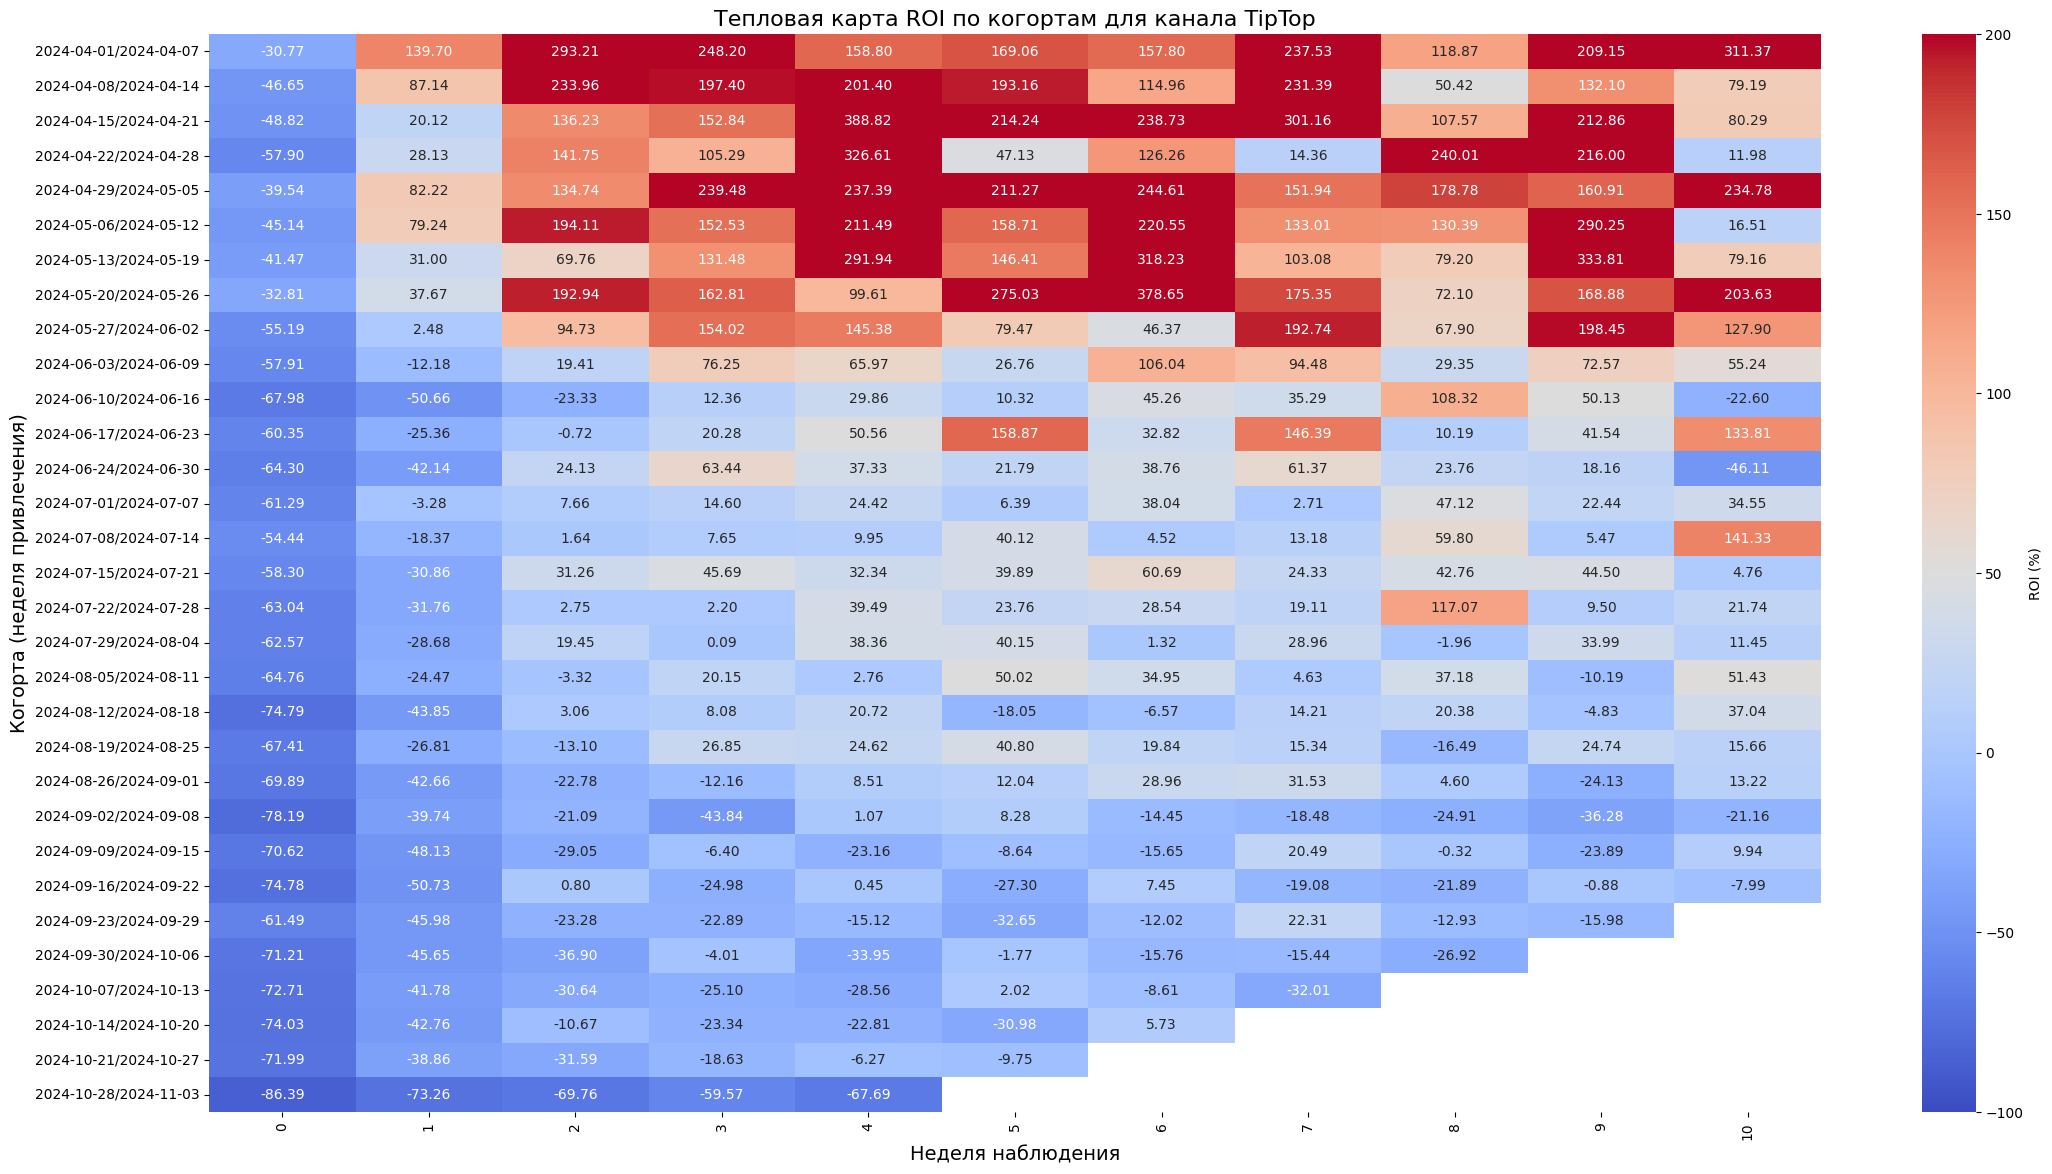

In [106]:
ltv_cac_TT['cohort_week'] = ltv_cac_TT['cohort_week'].astype(str)


pivot_table = ltv_cac_TT.pivot_table(
    values='ROI',
    index='cohort_week',
    columns='n_week'
)

plt.figure(figsize=(26, 14))

heatmap = sns.heatmap(
    pivot_table,
    annot=True,                    
    fmt='.2f',                     
    cmap='coolwarm',              
    cbar_kws={'label': 'ROI (%)'}, 
    vmin=-100,                    
    vmax=200                      
)


plt.title('Тепловая карта ROI по когортам для канала TipTop', fontsize=16)
plt.xlabel('Неделя наблюдения', fontsize=14)
plt.ylabel('Когорта (неделя привлечения)', fontsize=14)
plt.xticks(rotation=90)
plt.show()


Окупаемость для канала TipTop падает с июня месяца. До июня канал окупает себя после 2 недели. Летом окупаемость достигается на 4-5 неделю, к концу анализируемого периода траты не окупаются даже за 10 недель

## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


### Выводы

1. Активность пользователей — дневная и месячная — а также коэффициент вовлеченности растут в течение анализируемого периода.

2. В июне ROI снижается из-за увеличения затрат (CAC), но в июле поднимается до 10% благодаря росту LTV. С августа ROI снова падает из-за роста CAC, при этом LTV остается стабильным на уровне 1,1-1,2.

3. Больше всего пользователей приходит через канал FaceBoom. На втором месте по привлечению пользователей — TipTop.

4. Динамика новых пользователей по всем каналам остается неизменной, кроме TipTop. С июня число привлеченных пользователей через TipTop растет.

5. Активность и вовлеченность пользователей в канале TipTop увеличиваются. В FaceBoom вовлеченность наименьшая, хотя он привлекает больше пользователей. Это значит, что TipTop привлекает более заинтересованную аудиторию, несмотря на меньшее количество новых пользователей.

6. Удержание пользователей канала FaceBoom самое низкое — менее 5%. У TipTop удержание растет.

7. Конверсия в покупку у TipTop растет на 5-7% с июня. У FaceBoom, наоборот, снижается на 5-7%.

8. Затраты на все каналы стабильны, кроме TipTop. С июня расходы на этот канал растут.

9. К 28 дню канал FaceBoom не окупается. У TipTop окупаемость падает с июня и к концу периода не достигает уровня за 28 дней.

10. Окупаемость TipTop снижается с июня. До этого канал окупался за 2 недели. Летом — за 4-5 недель, а к концу периода затраты не окупаются даже за 10 недель.


### Рекомендации

1. Оптимизация канала FaceBoom:
- Уменьшить рекламный бюджет на 30-40% из-за низкого удержания (менее 5%) и низкой конверсии в покупку.
- Провести анализ целевой аудитории и скорректировать параметры таргетинга для привлечения более заинтересованных пользователей.

2. Усиление работы с каналом TipTop:
-  Провести детальный анализ причин роста расходов при сохранении стабильного LTV.

3. Рекомендации по метрикам:
- Провести анализ ROI по каждому каналу с разбивкой по сегментам пользователей для выявления снижения ROI к концу периода
- Разработать стратегию снижения CAC при сохранении качества аудитории.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

  
    
👍 Спасибо, в выводы можно еще указать про TipTop — канал вовликает заинтересованную аудиторию, но она стала слишком дорогой.
    


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__

    
В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊

---

От себя хочу порекомендовать тебе отличный материал про продуктовую аналитику Дмитрия Животворева. 
    
https://www.youtube.com/watch?v=Vy_rq-x9QEo
    